In [2]:
%matplotlib inline
import bacco
import numpy as np
import matplotlib.pyplot as plt

import imp
import os
import time

import scipy.stats

import bacco.probabilistic_bias as pb
from bacco.decorators import h5cache

import cached_bias as cb

%load_ext autoreload

#cachedir="/scratch/stuecker/data/cache/cumulant_bias"
cachedir="/scratch/stuecker/data/cache/eulerian_test"

t = 49
sim = bacco.Simulation(basedir="/bacco_storage/Rings_Simulations/TheOne_N2288_L512/0.00", 
                       halo_file="groups_%03d/fof_subhalo_history_tab_orph_wweight_%03d" % (t,t))
# Quick Test

In [53]:
%autoreload

In [54]:
t = 49
sim = bacco.Simulation(basedir="/bacco_storage/Rings_Simulations/TheOne_N2288_L512/0.00", 
                       halo_file="groups_%03d/fof_subhalo_history_tab_orph_wweight_%03d" % (t,t))


Linear Fields 8.888
Read particle positions 48.996
Lagrangian sorting of particle positions 54.914


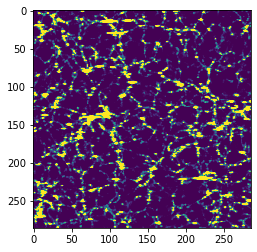

In [55]:
pbm = pb.ProbabilisticBiasManager(sim, ngrid="sdm8", damping_scale=0.75, variables=("J2","J4"), verbose=2)
model = pbm.setup_bias_model(bias_class=pb.TensorBiasND, terms=("J2", "J22", "J4"), spatial_order=4)
model.update_par([0.5,0.,0]) # set some arbitrary bias parameters for test
rhoeul = pbm.eulerian_tracer_density(zspace=True)[0]
plt.imshow(rhoeul[0], vmin=0, vmax=4)

# Save Galaxies

In [ ]:
qgal = np.load("SHAMe_RedSample_TheOne_N4320_L1440_3.14_z0.9_n0.002_qgal.npy")

t = 26
sim = bacco.Simulation(basedir="/cosmos_storage/cosmosims/Rings_Simulations/TheOne_N4320_L1440/3.14", 
                       halo_file="groups_%03d/fof_subhalo_history_tab_orph_wweight_%03d" % (t,t))

In [ ]:
%%time
submask = np.load("/lscratch/scontre/Project_Test/subID_TheOne_3p14_z0p9_RedSample.npy")
np.save("/scratch/stuecker/data/bias_mock/galpos_RedSample.npy", sim.sub["pos"][submask])
np.save("/scratch/stuecker/data/bias_mock/galvel_RedSample.npy", sim.sub["vel"][submask])
np.save("/scratch/stuecker/data/bias_mock/galvpeak_RedSample.npy", sim.sub["vpeak"][submask])

In [83]:
vel_factor = 1 / (sim.Cosmology.expfactor * 100. * sim.Cosmology.Ez_function(sim.Cosmology.expfactor))
xz = np.load("/scratch/stuecker/data/bias_mock/galpos_RedSample.npy") + np.load("/scratch/stuecker/data/bias_mock/galvel_RedSample.npy")*np.array((0.,0.,vel_factor))
np.save("/scratch/stuecker/data/bias_mock/galposz_RedSample.npy", xz)

In [70]:
cachedir="/scratch/stuecker/data/cache/eulerian_test"
pbm = pb.ProbabilisticBiasManager(sim, ngrid="sdm8", damping_scale=0.75, variables=("J2","J4"), verbose=2, cachedir=cachedir)

# Using Galaxies

In [64]:
vpeak = np.load("/scratch/stuecker/data/bias_mock/galvpeak_RedSample.npy")

In [77]:
"%.0e" % 2e-4

'2e-04'

In [85]:
for ndens in 2e-3,1e-3,5e-4,2e-4:#1e-3,5e-4,2e-4:
    vsel = np.percentile(vpeak, 100.*(1.-ndens/2e-3))
    sel = vpeak >= vsel
    
    model_exp2 = pbm.setup_bias_model(bias_class=pb.TensorBiasND, terms=("J2", "J22", "J4"), spatial_order=4)
    pbm.fit_bias(model = model_exp2, tracer_q = qgal[sel])
    model_gaus = pbm.setup_bias_model(bias_class=pb.TensorGaussianBiasND, terms=("J2", "J22", "J4", "J24", "J44"), spatial_order=4)
    pbm.fit_bias(model = model_gaus, tracer_q = qgal[sel])
    
    print(vsel, "%.2e" % (np.sum(sel) /sim.header["BoxSize"]**3), model_gaus.par[0:2])
    
    np.save("/scratch/stuecker/data/bias_mock/mask_%.0e.npy" % ndens, sel)
    np.save("/scratch/stuecker/data/bias_mock/rhogal_%.0e_eul_bias_expansion.npy" % ndens, pbm.eulerian_tracer_density(model=model_exp2)[0])
    np.save("/scratch/stuecker/data/bias_mock/rhogalz_%.0e_eul_bias_expansion.npy" % ndens, pbm.eulerian_tracer_density(model=model_exp2, zspace=True)[0])
    np.save("/scratch/stuecker/data/bias_mock/rhogal_%.0e_eul_bias_gaus.npy" % ndens, pbm.eulerian_tracer_density(model=model_gaus)[0])
    np.save("/scratch/stuecker/data/bias_mock/rhogalz_%.0e_eul_bias_gaus.npy" % ndens, pbm.eulerian_tracer_density(model=model_gaus, zspace=True)[0])

Tracers Q 0.001
Tracers Value 0.252
Tracers Mask 0.294
Define Tracers 0.567
Tracers Q 0.002
Tracers Value 0.238
Tracers Mask 0.349
Define Tracers 0.620
159.6342010498047 2.00e-03 [ 0.5802856  -0.22223507]
Tracers Q 0.001
Tracers Value 0.128
Tracers Mask 0.150
Define Tracers 0.305
Tracers Q 0.003
Tracers Value 0.130
Tracers Mask 0.145
Define Tracers 0.296
316.33056640625 1.00e-03 [0.84652842 0.05898658]
Tracers Q 0.001
Tracers Value 0.051
Tracers Mask 0.056
Define Tracers 0.118
Tracers Q 0.001
Tracers Value 0.039
Tracers Mask 0.059
Define Tracers 0.099
391.791748046875 5.00e-04 [1.13333258 0.54724149]
Tracers Q 0.000
Tracers Value 0.021
Tracers Mask 0.030
Define Tracers 0.051
Tracers Q 0.000
Tracers Value 0.037
Tracers Mask 0.034
Define Tracers 0.080
494.84208374023444 2.00e-04 [1.56857421 1.60839095]


In [84]:
!ls /scratch/stuecker/data/bias_mock

galpos_RedSample.npy		     rhogal_2e-04_eul_bias_gaus.npy
galposz_RedSample.npy		     rhogal_5e-04_eul_bias_expansion.npy
galvel_RedSample.npy		     rhogal_5e-04_eul_bias_gaus.npy
galvpeak_RedSample.npy		     rhogal_eul_bias_expansion.npy
mask_1e-03.npy			     rhogal_eul_bias_gaus.npy
mask_2e-03.npy			     rhogal_eulz_bias_expansion.npy
mask_2e-04.npy			     rhogalz_1e-03_eul_bias_expansion.npy
mask_5e-04.npy			     rhogalz_1e-03_eul_bias_gaus.npy
rhodm_eul.npy			     rhogalz_2e-03_eul_bias_expansion.npy
rhogal_1e-03_eul_bias_expansion.npy  rhogalz_2e-03_eul_bias_gaus.npy
rhogal_1e-03_eul_bias_gaus.npy	     rhogalz_2e-04_eul_bias_expansion.npy
rhogal_2e-03_eul_bias_expansion.npy  rhogalz_2e-04_eul_bias_gaus.npy
rhogal_2e-03_eul_bias_gaus.npy	     rhogalz_5e-04_eul_bias_expansion.npy
rhogal_2e-04_eul_bias_expansion.npy  rhogalz_5e-04_eul_bias_gaus.npy


In [58]:
rhoeul_exp2 = pbm.eulerian_tracer_density(model=model_exp2)[0]
np.save("/scratch/stuecker/data/bias_mock/rhogal_eul_bias_expansion.npy", rhoeul_exp2)
rhoeul_exp2z = pbm.eulerian_tracer_density(model=model_exp2, zspace=True)[0]
np.save("/scratch/stuecker/data/bias_mock/rhogal_eulz_bias_expansion.npy", rhoeul_exp2z)

Read particle positions 959.915
Lagrangian sorting of particle positions 389.917
Read particle positions 98.324
Lagrangian sorting of particle positions 474.098


In [7]:
rhoeul_gaus = pbm.eulerian_tracer_density(model=model_gaus)[0]
np.save("/scratch/stuecker/data/bias_mock/rhogal_eul_bias_gaus.npy", rhoeul_gaus)

In [8]:
model_exp2.update_par([0.,0.,0.])
rhoeul_dm = pbm.eulerian_tracer_density(model=model_exp2)[0]
np.save("/scratch/stuecker/data/bias_mock/rhodm_eul.npy", rhoeul_dm)

# Eulerian Tracer Galaxies

CPU times: user 32.2 s, sys: 57.6 s, total: 1min 29s
Wall time: 9min 8s


In [11]:
for key in sim.header.keys():
    print(key, ":", sim.header[key])

BoxSize : 1440.0
Omega : 0.307112
OmegaBaryon : 0.048252
OmegaLambda : 0.692888
PowerSpectrumFile : /dipc_storage/cosmosims/Rings_Simulations/TheOne_N4320_L1440/3.14/inputspec_snap.txt
Sigma8 : 0.9
As : None
OutputDir : b'./power_N4320_L1440.0_output/3.14/'
Redshift : 0.8793876873847359
Time : 0.5320881937837696
ParticleMass : 0.3156997325241908
NpartTotal : 80621568000
Nfiles : 4320
Nsample : 4320
HubbleParam : 0.6777
TimeBegin : 0.02
Seed : -406168
ns : 0.9611
w0 : -1.0
wa : 0.0
ReNormalizeInputSpectrum : (False,)
tau : 0.0952
OmegaNu : 0.0
WhichSpectrum : 2
UseRadiation : 0
Softening : 0.005
FixedInitialAmplitude : 1
Nmesh : 128
UnitLength_in_cm : 3.085678e+24
NewtonsConstant : 43.0071057317063
InitialPhase : 3.141592653589793


In [86]:
vel_factor = 1 / (sim.Cosmology.expfactor * 100. * sim.Cosmology.Ez_function(sim.Cosmology.expfactor))
print(vel_factor)

0.011371337314489001


# New test to read

In [89]:
!ls /scratch/stuecker/data/bias_mock/

galpos_RedSample.npy		     rhogal_eul_bias_gaus.npy
galposz_RedSample.npy		     rhogal_eulz_bias_expansion.npy
galvel_RedSample.npy		     rhogalz_1e-03_eul_bias_expansion.npy
galvpeak_RedSample.npy		     rhogalz_1e-03_eul_bias_gaus.npy
mask_1e-03.npy			     rhogalz_1e-03_eulz_bias_expansion.npy
mask_2e-03.npy			     rhogalz_1e-03_eulz_bias_gaus.npy
mask_2e-04.npy			     rhogalz_2e-03_eul_bias_expansion.npy
mask_5e-04.npy			     rhogalz_2e-03_eul_bias_gaus.npy
rhodm_eul.npy			     rhogalz_2e-03_eulz_bias_expansion.npy
rhogal_1e-03_eul_bias_expansion.npy  rhogalz_2e-03_eulz_bias_gaus.npy
rhogal_1e-03_eul_bias_gaus.npy	     rhogalz_2e-04_eul_bias_expansion.npy
rhogal_2e-03_eul_bias_expansion.npy  rhogalz_2e-04_eul_bias_gaus.npy
rhogal_2e-03_eul_bias_gaus.npy	     rhogalz_2e-04_eulz_bias_expansion.npy
rhogal_2e-04_eul_bias_expansion.npy  rhogalz_2e-04_eulz_bias_gaus.npy
rhogal_2e-04_eul_bias_gaus.npy	     rhogalz_5e-04_eul_bias_expansion.npy
rhogal_5e-04_eul_bias_expansion.npy  rhogalz_5e-

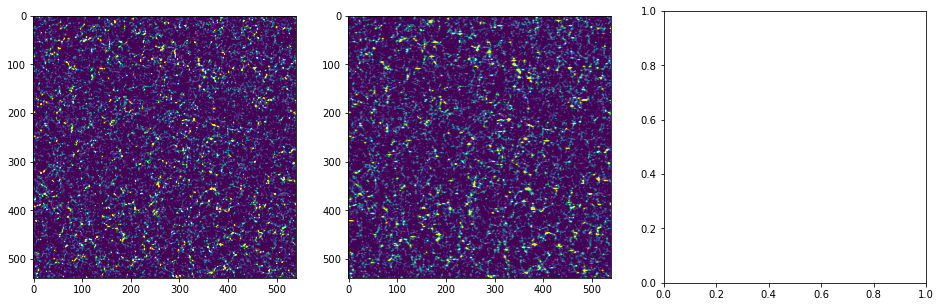

In [90]:
rho1 = np.load("/scratch/stuecker/data/bias_mock/rhogal_1e-03_eul_bias_expansion.npy")
rho2 = np.load("/scratch/stuecker/data/bias_mock/rhogalz_1e-03_eul_bias_expansion.npy")

fig, axs = plt.subplots(1,3, figsize=(16,5))
axs[0].imshow(rho1[0], vmax=10, vmin=0)
axs[1].imshow(rho2[0], vmax=10, vmin=0)

# Test to read

In [18]:
print(np.std(rho1-rho2))

0.0


In [20]:
rho1 = np.load("/scratch/stuecker/data/bias_mock/rhogal_eul_bias_expansion.npy")
rho2 = np.load("/scratch/stuecker/data/bias_mock/rhogal_eul_bias_gaus.npy")
rho3 = np.load("/scratch/stuecker/data/bias_mock/rhodm_eul.npy")

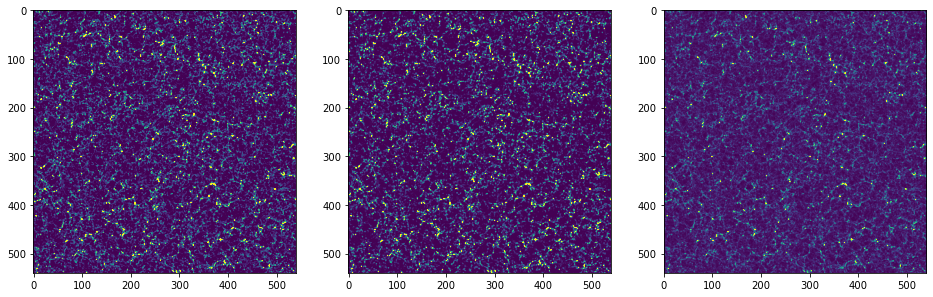

In [25]:
fig, axs = plt.subplots(1,3, figsize=(16,5))
axs[0].imshow(rho1[0], vmax=10, vmin=0)
axs[1].imshow(rho2[0], vmax=10)
axs[2].imshow(rho3[0], vmax=10)

# Test

In [4]:
from bacco.statistics import compute_mesh

In [17]:
xtest = np.random.uniform(20., 80., (10000,3))
vtest = np.random.normal(0., 1000., size=(10000,3))

rhodm = compute_mesh(128, box=100., pos=xtest, vel=vtest, cosmology=sim.Cosmology, zspace=True)[0]

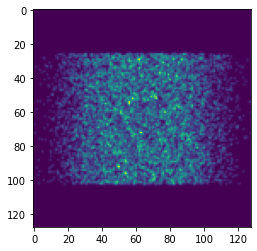

In [18]:
plt.imshow(np.mean(rhodm, axis=0))

In [39]:
H = 100.#sim.Cosmology.get_hubble_z(sim.header["Time"])/sim.Cosmology.get_hubble_z(1.0) * 100.
vel_factor = 1 / (sim.Cosmology.expfactor * 100. * sim.Cosmology.Ez_function(sim.Cosmology.expfactor)) 
xz = xtest + vtest*np.array((0.,0.,vel_factor))
rhodm2 = compute_mesh(128, box=100., pos=xz%100., vel=vtest, cosmology=sim.Cosmology, zspace=False)[0]

115.25307371172363
